# $ \text{Т.1} $

$ \text{Случайный вектор } (\xi_1, \xi_2, \xi_3, \xi_4, \xi_5, \eta) \\ \text{ имеет компоненты, распределенные по следующему закону:} \\ \xi_k \sim R(-1,1)$, $\eta \sim N(2 + 3x_1 - 2x_2 + x_3 + x_4 - x_5, 1.5^2) \text{,} \\ \text{ где } x_k \text{ это значения, которые принимает случайная величина } \xi_k \\ \text{ Сгенерировать выборку объема} n = 50 $

In [715]:
from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich.text import Text

import math
import matplotlib.pyplot as polt
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

from seaborn import boxplot as boxpolt

console = Console()
table = Table()

np.random.seed(34)

In [716]:
# Размер выборки
N = 50

# Доверительная информация
beta_sign = 0.95
alpha_sign = 1 - beta_sign

# Кол-во кси в случайном векторе
ksi_amount = 5

# Кол-во базисных функций
P = ksi_amount + 1

# Массив выборки
sample = []

# Генерация выборки:
for i in range(N):
  x_1, x_2, x_3, x_4, x_5 = st.uniform(loc=-1, scale=1 - (-1)).rvs(ksi_amount)

  eta = st.norm(loc=2 + 3 * x_1 - 2 * x_2 + x_3 + x_4 - x_5, scale=1.5).rvs(1)

  sample.append([x_1, x_2, x_3, x_4, x_5, *eta])

sample = np.array(sample)

# Словарь выборки
sample_df = pd.DataFrame({
    "ξ_1": sample[:, 0],
    "ξ_2": sample[:, 1],
    "ξ_3": sample[:, 2],
    "ξ_4": sample[:, 3],
    "ξ_5": sample[:, 4],
    "η": sample[:, 5]
})

In [717]:
table = Table(title="Выборка")

table.add_column("N", justify="center")

labels = ["ξ_1", "ξ_2", "ξ_3", "ξ_4", "ξ_5", "η"]

for label in labels:
  table.add_column(label, justify="center")

for i in range(N):
  table.add_row(f"{i + 1}",
                *[f"{sample_df[label][i]:.5f}" for label in labels])

console.print(table)

                                Выборка                                 
┏━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ N  ┃   ξ_1    ┃   ξ_2    ┃   ξ_3    ┃   ξ_4    ┃   ξ_5    ┃    η     ┃
┡━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ 1  │ -0.92288 │ 0.56020  │ -0.81459 │ 0.26579  │ -0.97222 │ -1.64002 │
│ 2  │ -0.49383 │ -0.62007 │ -0.17035 │ -0.97316 │ 0.29695  │ 1.35418  │
│ 3  │ 0.73874  │ 0.21807  │ 0.61599  │ 0.65302  │ -0.45663 │ 4.73922  │
│ 4  │ -0.72338 │ 0.42944  │ -0.05493 │ 0.11318  │ -0.22885 │ 0.44407  │
│ 5  │ 0.88229  │ -0.83762 │ 0.83453  │ -0.68613 │ -0.11171 │ 5.73974  │
│ 6  │ 0.02960  │ 0.78580  │ 0.84736  │ 0.67196  │ -0.00069 │ 1.29161  │
│ 7  │ 0.64193  │ 0.86878  │ 0.58962  │ -0.07683 │ -0.29462 │ 2.29408  │
│ 8  │ 0.39826  │ 0.29541  │ -0.55293 │ 0.60370  │ 0.02422  │ 1.52573  │
│ 9  │ -0.84268 │ -0.93168 │ 0.13230  │ -0.70065 │ -0.51753 │ 1.40619  │
│ 10 │ 0.70886  │ -0.60049 │ 0.61410  │ -0.84911 │ 0.27207  │ 4.45645  │
│ 11 │ 0.66169  │ -0.41696 │ -0.04861 │ -0.65195 │ 0.90594  │ 4.10519  │
│ 12 │ 0.87160  │ 0.25985  │ -0.33723 │ -0.05856 │ 0.60426  │ 3.69310  │
│ 13 │ 0.88561  │ -0.67235 │ 0.23736  │ -0.95335 │ -0.84253 │ 6.49779  │
│ 14 │ -0.55227 │ -0.00227 │ 0.94271  │ -0.62479 │ 0.56548  │ 1.40564  │
│ 15 │ 0.22721  │ 0.17233  │ -0.08004 │ -0.44514 │ 0.64296  │ 0.91837  │
│ 16 │ 0.80616  │ 0.28112  │ -0.86114 │ -0.00063 │ 0.53017  │ 3.48586  │
│ 17 │ 0.61353  │ -0.03752 │ 0.76795  │ 0.99106  │ 0.87144  │ 5.67552  │
│ 18 │ -0.34176 │ 0.30443  │ -0.10234 │ 0.34195  │ 0.13411  │ 0.30416  │
│ 19 │ -0.94138 │ 0.91615  │ -0.85818 │ -0.35572 │ -0.99240 │ -5.04112 │
│ 20 │ -0.47968 │ -0.99359 │ -0.73254 │ -0.64102 │ -0.76431 │ 1.71341  │
│ 21 │ 0.83427  │ 0.46434  │ -0.55434 │ -0.97320 │ -0.68205 │ 3.42410  │
│ 22 │ -0.45588 │ 0.62514  │ 0.99073  │ -0.63631 │ -0.13215 │ -0.20819 │
│ 23 │ 0.25286  │ 0.32708  │ 0.61393  │ -0.14848 │ -0.93635 │ 6.66970  │
│ 24 │ -0.48840 │ -0.98765 │ -0.88316 │ -0.68962 │ 0.83549  │ -0.33178 │
│ 25 │ 0.12615  │ -0.81725 │ 0.92599  │ -0.58683 │ 0.02435  │ 4.65179  │
│ 26 │ -0.55712 │ 0.97510  │ -0.21507 │ -0.96384 │ -0.29519 │ -4.49163 │
│ 27 │ 0.44581  │ -0.52557 │ -0.75195 │ 0.17993  │ -0.00393 │ 2.66217  │
│ 28 │ -0.08101 │ 0.50417  │ -0.78889 │ -0.89105 │ 0.73315  │ -4.24934 │
│ 29 │ -0.89219 │ 0.64245  │ 0.40536  │ 0.60833  │ -0.74250 │ 1.96519  │
│ 30 │ -0.04212 │ -0.84295 │ -0.09671 │ 0.85943  │ 0.52492  │ 2.22444  │
│ 31 │ 0.56953  │ 0.93048  │ 0.59396  │ -0.32944 │ 0.04833  │ 1.43264  │
│ 32 │ 0.85769  │ -0.39116 │ 0.97616  │ -0.98855 │ 0.28370  │ 3.76027  │
│ 33 │ 0.16699  │ 0.27398  │ -0.98104 │ 0.10677  │ 0.04048  │ -0.98018 │
│ 34 │ 0.64261  │ -0.10097 │ 0.90604  │ 0.21264  │ 0.41702  │ 7.40123  │
│ 35 │ 0.76323  │ -0.81588 │ 0.77287  │ -0.27803 │ 0.79001  │ 5.40038  │
│ 36 │ 0.08665  │ 0.97407  │ 0.92533  │ 0.25555  │ 0.81485  │ 2.29327  │
│ 37 │ 0.05739  │ 0.23172  │ 0.03804  │ -0.07746 │ 0.07088  │ 1.87575  │
│ 38 │ 0.43806  │ 0.23947  │ 0.93154  │ -0.93156 │ 0.73917  │ 0.90205  │
│ 39 │ -0.07059 │ -0.69515 │ -0.64623 │ -0.02538 │ 0.41699  │ 0.41458  │
│ 40 │ -0.75430 │ -0.45707 │ -0.30852 │ -0.09555 │ -0.61887 │ 1.19776  │
│ 41 │ -0.36182 │ -0.56397 │ 0.87086  │ -0.23963 │ 0.41749  │ 1.65723  │
│ 42 │ 0.22685  │ -0.08906 │ -0.40285 │ 0.44890  │ -0.15765 │ 1.67821  │
│ 43 │ 0.59560  │ 0.35619  │ 0.38143  │ 0.49673  │ 0.47044  │ 2.84520  │
│ 44 │ 0.90027  │ 0.98384  │ -0.64260 │ -0.29940 │ 0.67961  │ 1.26729  │
│ 45 │ 0.49165  │ -0.53228 │ 0.97171  │ -0.47394 │ 0.20006  │ 3.66764  │
│ 46 │ 0.40658  │ -0.25695 │ 0.75813  │ 0.32479  │ 0.95951  │ 3.90844  │
│ 47 │ -0.22322 │ 0.73540  │ -0.54312 │ 0.78463  │ -0.03104 │ 2.20352  │
│ 48 │ 0.71860  │ 0.93182  │ -0.64220 │ 0.10666  │ -0.73541 │ 2.36569  │
│ 49 │ -0.01176 │ -0.93237 │ -0.16008 │ -0.00542 │ -0.42753 │ 5.98855  │
│ 50 │ 0.62862  │ 0.21283  │ -0.23047 │ -0.57733 │ -0.91746 │ 4.73851  │
└────┴──────────┴──────────┴──────────┴──────────┴────────

## $ \text{a) Проверить переменные } \xi_k \\ \text{ на мультиколлинеарность.} $

$$ \xi_1 = b_1 + b_2\xi_2 + ... + b_k\xi_k + \varepsilon $$

$$ \text{Находим } R^2 $$

$$

\begin{cases}
> 0.7 - \text{можно выбросить } \xi_1 \\
< 0.7 - \text{нельзя избавляться} 
\end{cases}

$$

$$ \xi_2 = b_1\xi_1 + b_2 + ... + b_k\xi_k + \varepsilon \rightarrow R^2 \text{ ? } 0.7 $$
$$ \xi_3 = ... \rightarrow R^2 \text{ ? } 0.7 $$

$$ \text{ ... } $$

In [718]:
table = Table(title="Коэффициент детерминации")

table.add_column("R²", justify="center")

labels = ["ξ_1", "ξ_2", "ξ_3", "ξ_4", "ξ_5"]
X = sample_df[labels]

row = []

for label in labels:
  table.add_column(label, justify="center")

  model = sm.OLS(X[label], sm.add_constant(X.drop(label, axis=1))).fit()
  row.append(model.rsquared)

table.add_row("=", *[f"{row[i]:.5f}" for i in range(ksi_amount)])

console.print(table)

                Коэффициент детерминации                
┏━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ R² ┃   ξ_1   ┃   ξ_2   ┃   ξ_3   ┃   ξ_4   ┃   ξ_5   ┃
┡━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ =  │ 0.10917 │ 0.09320 │ 0.08352 │ 0.07101 │ 0.13730 │
└────┴─────────┴─────────┴─────────┴─────────┴─────────┘

## $ \text{b) Определить уравнение линейной регрессии} \\ \eta = \beta_0 + \sum_{k=1}^{5} \beta_k \xi_k \\ \text{ и проверить значимость коэффициентов.} $

In [719]:
PSI = np.hstack([np.ones(shape=(N, 1)), sample[:, :-1]])  # матрица наблюдений

Y = sample[:, ksi_amount]
F = PSI.T @ PSI
b = np.linalg.inv(F) @ PSI.T @ Y

In [720]:
model = sm.OLS(sample_df['η'], PSI).fit()

In [721]:
console.print(Panel(Text(f"y = {b[0]:.5}{"".join([f"{" + " if b[i + 1] > 0 else " - "}"
                         f"{np.abs(b[i + 1]):.5} • x_{i + 1}" for i in range(ksi_amount)])} + e",
                         style="bold"),
                    title="Уравнение линейной регрессии"),
              justify="left")

╭────────────────────────────── Уравнение линейной регрессии ───────────────────────────────╮                      
│ y = 1.9949 + 2.9878 • x_1 - 2.0369 • x_2 + 1.4956 • x_3 + 1.3781 • x_4 - 1.3907 • x_5 + e │                      
╰───────────────────────────────────────────────────────────────────────────────────────────╯

In [722]:
e = Y - PSI @ b
RSS = e.T @ e

In [723]:
console.print(Panel(Text(f"{RSS:.5f}",
                         style="bold"),
                    title="Residual Sum of Squares"),
              justify="left")

╭─ Residual Sum of Squares ─╮                                                                                      
│ 71.20289                  │                                                                                      
╰───────────────────────────╯

In [724]:
deltas = []
p_values = []

for i in range(P):
  deltas.append(b[i] / np.sqrt(RSS * np.linalg.inv(F)[i, i]) * np.sqrt(N - P))
  p_values.append(2 * st.t.cdf(-abs(deltas[-1]), df=(N - P)))

In [725]:
table = Table(title="Значимость коэффициентов")

table.add_column("", justify="center")

labels = ["β_0", "β_1", "β_2", "β_3", "β_4", "β_5"]
row_labels = ["Δ", "p-value", "значим?"]

for label in labels:
  table.add_column(label, justify="center")

table_dict = {
  "Δ": [f"{delta:.5f}" for delta in deltas],
  "p-value": [f"{p_value:e}" for p_value in p_values],
  "значим?": ["Нет" if p_value > alpha_sign else "Да" for p_value in p_values]
}

for label in row_labels:
  table.add_row(label,
                *[f"{table_dict[label][i]}" for i in range(P)])

console.print(table)

                                      Значимость коэффициентов                                       
┏━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃         ┃     β_0      ┃     β_1      ┃     β_2      ┃     β_3      ┃     β_4      ┃     β_5      ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│    Δ    │   10.23727   │   8.95820    │   -6.74720   │   5.19329    │   4.08300    │   -4.11770   │
│ p-value │ 3.225324e-13 │ 1.774720e-11 │ 2.685954e-08 │ 5.079797e-06 │ 1.847006e-04 │ 1.657464e-04 │
│ значим? │      Да      │      Да      │      Да      │      Да      │      Да      │      Да      │
└─────────┴──────────────┴──────────────┴──────────────┴──────────────┴──────────────┴──────────────┘

## $ \text{c) Определить коэффициент детерминации} \\ \text{и проверить его значимость.} $

! значимость коэфф. детерминации = значимость всей регрессии !

In [726]:
TSS = np.sum((Y - Y.mean()) ** 2)
R2 = 1 - RSS / TSS

In [727]:
console.print(Panel(Text(f"{R2:.5f}",
                         style="bold"),
                    title="Коэффициент детерминации"),
              justify="left")

╭─ Коэффициент детерминации ─╮                                                                                     
│ 0.79751                    │                                                                                     
╰────────────────────────────╯

In [728]:
delta = ((TSS - RSS) / (P - 1)) / (RSS / (N - P))

p_value = st.f.sf(delta, P - 1, N - P)

In [729]:
table = Table(title="Значимость коэффициента детерминации")

labels = ["Δ", "p-value", "значим?"]

for label in labels:
  table.add_column(label, justify="center")

table.add_row(*[f"{delta:.5f}", f"{p_value:e}", "Нет" if p_value > alpha_sign else "Да"])

console.print(table)

Значимость коэффициента детерминации 
┏━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃    Δ     ┃   p-value    ┃ значим? ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ 34.65877 │ 3.362212e-14 │   Да    │
└──────────┴──────────────┴─────────┘

## $ \text{d) Найти значение в точке } x_k = 0 \\ \text{ и построить 95\% доверительный интервал.} $

$ x_0 \neq 0 $

In [730]:
x = np.array([1, 0, 0, 0, 0, 0])
y = np.sum(b * x)

delta = st.t.ppf(1 - (alpha_sign / 2), N - P) * \
    np.sqrt(1 + x @ np.linalg.inv(F) @ x.T) * np.sqrt(RSS / (N - P))

In [731]:
lower_bound = y - delta
upper_bound = y + delta

console.print(Panel(Text(f"({lower_bound:.5f}; {upper_bound:.5f})\n\tl = {(upper_bound - lower_bound):.5f}",
                         style="bold"),
                    title="Доверительный интервал"),
              justify="left")

╭─ Доверительный интервал ─╮                                                                                       
│ (-0.59877; 4.58856)      │                                                                                       
│         l = 5.18732      │                                                                                       
╰──────────────────────────╯

## $ \text{e) Проверить предположение } \\ \text{ о независимости ошибок измерения.} $

$H_0: \text{ Ошибки измерения независимы и одинаковы распределены} $

$H_1: \overline H_0$

In [732]:
# Кол-во нарушений порядка
inv_amount = sum(1 for i in range(N) for j in range(i) if e[j] > e[i])

delta = (inv_amount - (N * (N - 1)) / 4) / np.sqrt(N ** 3 / 36)

p_value = 2 * st.norm.sf(np.abs(delta), 0, 1)

In [733]:
table = Table(title="Ошибки измерения независимы и одинаковы распределены")

labels = ["Δ", "p-value", "H_0 отвергается?"]

for label in labels:
  table.add_column(label, justify="center")

table.add_row(*[f"{delta:.5f}", f"{p_value:.5f}", "Нет" if p_value > alpha_sign else "Да"])

console.print(table)

 Ошибки измерения независимы и одинаковы 
              распределены               
┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃    Δ     ┃ p-value ┃ H_0 отвергается? ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ -0.22910 │ 0.81879 │       Нет        │
└──────────┴─────────┴──────────────────┘

## $ \text{f) Проверить предположение } \\ \text{ о нормальности распределения ошибок.} $

$H_0: \text{ Ошибки измерения нормально распределены} $

$H_1: \overline H_0$

In [734]:
def F_norm(x, alpha, sigma):
  return 0.5 * (1 + math.erf((x - alpha) / (np.sqrt(2) * sigma)))


x = sorted(e)

F_emp = np.array([i for i in range(len(x) + 1)]) / N

In [735]:
# Количество повторений bootstrap
bootstrap_iterations = 50_000

# оценка sigma_2 ** 2
disp_wave_2 = (RSS / (N - P)) ** 0.5

delta_wave = np.sqrt(N) * np.max([max(np.abs(F_norm(x[i], 0, disp_wave_2) - F_emp[i]),
                                      np.abs(F_norm(x[i], 0, disp_wave_2) - F_emp[i + 1])) for i in range(N)])

bootstrap_delta = []

for _ in range(bootstrap_iterations):
  # Случайная выборка, соотв норм. распределению с параметрами из О.М.П.Г.
  random_sample = np.array(sorted(np.random.normal(0, disp_wave_2, N)))

  # Оценка мат. ожидания по случайной подвыборке (bootstrap)
  alpha_bootstrap = random_sample.mean()

  # Оценка корня дисперсии по случайной подвыборке (bootstrap)
  sigma_bootstrap = np.sqrt(random_sample.var() * N / (N - 1))

  F_bootstrap_emp = [i / N for i in range(N + 1)]

  # Функция нормального распределения по случайной подвыборке (bootstrap)
  def F_bootstrap_wave(j):
    return F_norm(random_sample[j], alpha_bootstrap, sigma_bootstrap)

  sup = np.max([max(np.abs(F_bootstrap_wave(j) - F_bootstrap_emp[j]),
                    np.abs(F_bootstrap_wave(j) - F_bootstrap_emp[j + 1]))
                for j in range(len(random_sample))])

  bootstrap_delta.append(np.sqrt(N) * sup)

bootstrap_delta = np.array(bootstrap_delta)

p_value = len(bootstrap_delta[bootstrap_delta >=
              delta_wave]) / bootstrap_iterations

In [736]:
table = Table(title="Ошибки измерения нормально распределены")

labels = ["p-value", "H_0 отвергается?"]

for label in labels:
  table.add_column(label, justify="center")

table.add_row(*[f"{p_value:.5f}", "Нет" if p_value > alpha_sign else "Да"])

console.print(table)

  Ошибки измерения нормально  
         распределены         
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ p-value ┃ H_0 отвергается? ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ 0.25548 │       Нет        │
└─────────┴──────────────────┘

## $ \text{g) Исследовать регрессию на выбросы.} $

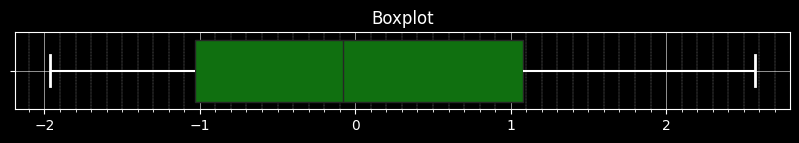

In [737]:
_, axs = polt.subplots(1, 1, figsize=(10, 1))

axs.set_title("Boxplot")

boxpolt(x=e,
        color="green",
        whiskerprops={"color": "white", "linewidth": 1.5},
        capprops={"color": "white", "linewidth": 2},
        flierprops={'markerfacecolor': 'white', 'markersize': 8})

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.show()

## $ \text{h) Провести кросс-проверку регрессии.} $

In [738]:
CVSS = 0
sample_copy = sample.copy()

for i in range(N):
  sample = np.vstack([sample_copy[:i, :], sample_copy[(i + 1):, :]])
  PSI = np.hstack([np.ones(shape=(N - 1, 1)), sample[:, :-1]])
  Y = sample[:, ksi_amount]
  F = PSI.T @ PSI
  b_cvss = np.linalg.inv(F) @ PSI.T @ Y

  e = Y - PSI @ b_cvss

  x = sample_copy[i, :-1]
  x = np.hstack([np.array([1]), x])
  y = np.sum(b_cvss * x)

  CVSS += (sample_copy[i, ksi_amount] - y) ** 2

R2CVSS = 1 - CVSS / TSS

sample = sample_copy

In [739]:
console.print(Panel(Text(f"CVSS = {CVSS:.5f}\nR2CVSS = {R2CVSS:.5f}",
                         style="bold"),
                    title="Кросс-проверка регрессии"),
              justify="left")

╭─ Кросс-проверка регрессии ─╮                                                                                     
│ CVSS = 92.81765            │                                                                                     
│ R2CVSS = 0.73604           │                                                                                     
╰────────────────────────────╯

## $ \text{i) Проверить адекватность регрессии,} \\ \text{ сделав 5 повторных измерений в одной точке.} $

In [740]:
l = 5  # кол-во измерений

x = [1, 0, 0, 0, 0]

y = []  # вектор измерений в одной точке
for i in range(5):
  y.append(st.norm(loc=2, scale=1.5).rvs(1))
y = np.array(y)

sigma = 1 / (l - 1) * np.sum((y - y.mean()) ** 2)

delta = RSS / (N - P) / sigma
p_value = st.f.sf(delta, N - P, l - 1)

In [741]:
table = Table(title="Адекватность модели")

labels = ["Δ", "p-value", "модель адекватна?"]

for label in labels:
  table.add_column(label, justify="center")

table.add_row(*[f"{delta:.5f}", f"{p_value:.5f}", "Да" if p_value > alpha_sign else "Нет"])

console.print(table)

           Адекватность модели           
┏━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃    Δ    ┃ p-value ┃ модель адекватна? ┃
┡━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ 1.38546 │ 0.41829 │        Да         │
└─────────┴─────────┴───────────────────┘

## $ \text{j) Удалить переменную,} \\ \text{ соответствующую наим. знач. коэф.} \\ \text{ и повторить пункты } b \text{ и } c \text{,} \\ \text{ сравнить уравнения регрессии.} $

In [742]:
index_to_drop = np.argmax(p_values)  # Номер самого незначимого коэффициента

new_ksi_amount = 4
P_new = 5

In [743]:
sample = np.hstack([sample[:, :index_to_drop], sample[:, index_to_drop + 1:]])

PSI = np.hstack([np.ones(shape=(N, 1)), sample[:, :-1]])

Y = sample[:, new_ksi_amount]
F = PSI.T @ PSI
b = np.linalg.inv(F) @ PSI.T @ Y

In [744]:
new_sample_df = pd.DataFrame({
    "ξ_1": sample[:, 0],
    "ξ_2": sample[:, 1],
    "ξ_3": sample[:, 2],
    "ξ_4": sample[:, 3],
    "η": sample[:, 4]
})

In [745]:
console.print(Panel(Text(f"y = {b[0]:.5}{"".join([f"{" + " if b[i + 1] > 0 else " - "}"
                         f"{np.abs(b[i + 1]):.5} • x_{i + 1 if i < index_to_drop - 1 else i + 2}" for i in range(new_ksi_amount)])} + e",
                         style="bold"),
                    title="Уравнение линейной регрессии"),
              justify="left")

╭─────────────────────── Уравнение линейной регрессии ───────────────────────╮                                     
│ y = 1.9677 + 2.6386 • x_1 - 1.8356 • x_2 + 1.2943 • x_3 + 1.2428 • x_5 + e │                                     
╰────────────────────────────────────────────────────────────────────────────╯

In [746]:
e = Y - PSI @ b
RSS0 = e.T @ e

In [747]:
console.print(Panel(Text(f"{RSS0:.5f}",
                         style="bold"),
                    title="Residual Sum of Squares"),
              justify="left")

╭─ Residual Sum of Squares ─╮                                                                                      
│ 98.64094                  │                                                                                      
╰───────────────────────────╯

In [748]:
deltas = []
p_values = []

for i in range(P_new):
  deltas.append(b[i] / np.sqrt(RSS0 * np.linalg.inv(F)[i, i]) * np.sqrt(N - P_new))
  p_values.append(2 * st.t.cdf(-abs(deltas[-1]), df=(N - P_new)))

In [749]:
table = Table(title="Значимость коэффициентов")

table.add_column("", justify="center")

labels = ["β_0", "β_1", "β_2", "β_3", "β_5"]
row_labels = ["Δ", "p-value", "значим?"]

for label in labels:
  table.add_column(label, justify="center")

table_dict = {
  "Δ": [f"{delta:.5f}" for delta in deltas],
  "p-value": [f"{p_value:e}" for p_value in p_values],
  "значим?": ["Нет" if p_value > alpha_sign else "Да" for p_value in p_values]
}

for label in row_labels:
  table.add_row(label,
                *[f"{table_dict[label][i]}" for i in range(P_new)])

console.print(table)

                               Значимость коэффициентов                               
┏━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃         ┃     β_0      ┃     β_1      ┃     β_2      ┃     β_3      ┃     β_5      ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│    Δ    │   8.68114    │   7.02844    │   -5.29418   │   3.91839    │   3.17876    │
│ p-value │ 3.593191e-11 │ 9.246987e-09 │ 3.434115e-06 │ 3.004068e-04 │ 2.675415e-03 │
│ значим? │      Да      │      Да      │      Да      │      Да      │      Да      │
└─────────┴──────────────┴──────────────┴──────────────┴──────────────┴──────────────┘

In [750]:
TSS0 = np.sum((Y - Y.mean()) ** 2)
R20 = 1 - RSS0 / TSS0

In [751]:
console.print(Panel(Text(f"{R20:.5f}",
                         style="bold"),
                    title="Коэффициент детерминации"),
              justify="left")

╭─ Коэффициент детерминации ─╮                                                                                     
│ 0.71948                    │                                                                                     
╰────────────────────────────╯

$$
H_0: \beta_i = 0, \forall i \in I
$$

$$
H_1: \exist i \in I: \beta_i \neq 0
$$


$$
\Delta = \frac{\frac{RSS_0 - RSS_1}{p_1 - p_0}}{\frac{RSS_1}{n - p_1}} \sim F(p_1 - p_0, n - p_1)
$$

In [752]:
delta = ((RSS0 - RSS) / (P - P_new)) / (RSS / (N - P))

p_value = st.f.sf(delta, P - P_new, N - P)

In [753]:
table = Table(title="Все β_i = 0 vs сущ. β_i = 0")

labels = ["Δ", "p-value", "H_0 отвергается?"]

for label in labels:
  table.add_column(label, justify="center")

table.add_row(*[f"{delta:.5f}", f"{p_value:.5f}", "Нет" if p_value > alpha_sign else "Да"])

console.print(table)

       Все β_i = 0 vs сущ. β_i = 0       
┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃    Δ     ┃ p-value ┃ H_0 отвергается? ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ 16.95542 │ 0.00017 │        Да        │
└──────────┴─────────┴──────────────────┘

## $ \text{k) Сравнить уравнения регрессии бутстрапом.} $

In [754]:
# Количество повторений бутстрапа
bootstrap_iterations = 1000

model_new = sm.OLS(new_sample_df['η'], PSI).fit()

# Оценка полученная ОМП
h_wave = model.rsquared - model_new.rsquared
bootstrap_delta = []

for _ in range(bootstrap_iterations):
  sample = sm.add_constant(sample_df.sample(n=N, replace=True))
  b_model = sm.OLS(sample.η, sample[['const', 'ξ_1', 'ξ_2', 'ξ_3', 'ξ_4', 'ξ_5']]).fit()
  b_model_new = sm.OLS(sample.η, sample[['const', 'ξ_1', 'ξ_2', 'ξ_3', 'ξ_4']]).fit()

  bootstrap_delta.append(b_model.rsquared - b_model_new.rsquared - h_wave)

variation_row = sorted(bootstrap_delta)

In [755]:
lower_bound = h_wave - variation_row[-1]
upper_bound = h_wave - variation_row[int((1 - beta_sign) * bootstrap_iterations)]

console.print(Panel(Text(f"({lower_bound:.5f}; {upper_bound:.5f})\n\tl = {(upper_bound - lower_bound):.5f}",
                         style="bold"),
                    title="Доверительный интервал"),
              justify="left")

if (lower_bound * upper_bound > 0):
  console.print("Различие значимо")
else:
  console.print("Различие незначимо")

╭─ Доверительный интервал ─╮                                                                                       
│ (-0.19194; 0.13757)      │                                                                                       
│         l = 0.32951      │                                                                                       
╰──────────────────────────╯

Различие незначимо